<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/Sarcasm_Detection_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import json 
datastore = []
for line in open('/content/drive/My Drive/train/Sarcasm/Sarcasm_Headlines_Dataset_v2.json','r'):
  datastore.append(json.loads(line))

In [0]:
sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [39]:
print(sentences[1])
print(len(labels))

dem rep. totally nails why congress is falling short on gender, racial equality
28619


In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [42]:
vocab_size = 10000
max_length = 50
embedding_dim = 200 
padd_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

30884


In [0]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,maxlen = max_length,padding = padd_type, truncating = trunc_type )

In [44]:
print(type(padded))

<class 'numpy.ndarray'>


In [45]:
labels = np.array(labels)
print(type(labels))

<class 'numpy.ndarray'>


In [0]:
from keras.layers import *

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(128,return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           2000000   
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 64)            64064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 11, 128)           98816     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 24)                1

In [49]:
num_epochs = 10
history = model.fit(padded, labels,epochs = num_epochs, verbose = 1,validation_split = 0.2)

Epoch 1/10
716/716 [==============================] - 49s 68ms/step - loss: 0.4230 - accuracy: 0.7970 - val_loss: 0.3546 - val_accuracy: 0.8541
Epoch 2/10
716/716 [==============================] - 48s 67ms/step - loss: 0.1929 - accuracy: 0.9306 - val_loss: 0.3413 - val_accuracy: 0.8494
Epoch 3/10
716/716 [==============================] - 48s 68ms/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.4982 - val_accuracy: 0.8480
Epoch 4/10
716/716 [==============================] - 48s 67ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.6730 - val_accuracy: 0.8433
Epoch 5/10
716/716 [==============================] - 48s 67ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.7312 - val_accuracy: 0.8349
Epoch 6/10
716/716 [==============================] - 48s 68ms/step - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.9393 - val_accuracy: 0.8421
Epoch 7/10
716/716 [==============================] - 48s 68ms/step - loss: 0.0132 - accuracy: 0.9951 - val_loss: 0.8943 - val_accuracy:

In [50]:
print(history.history['val_accuracy'][9])
print(history.history['val_loss'][9])

0.8340321183204651
1.1309618949890137


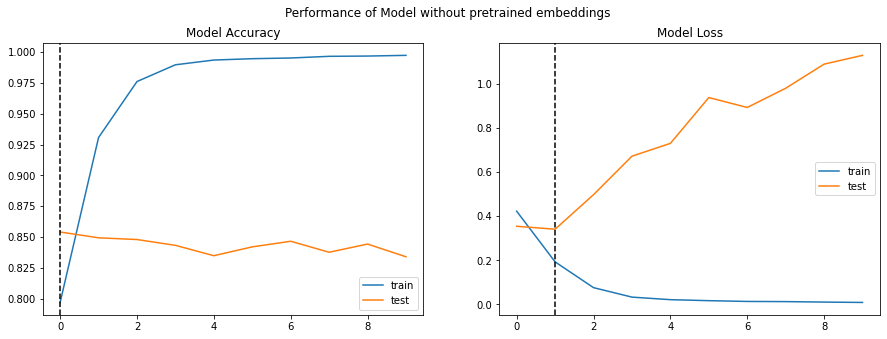

In [51]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model without pretrained embeddings")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()
